# HG002 IGH

In [8]:
import gzip
import lakeview as lv

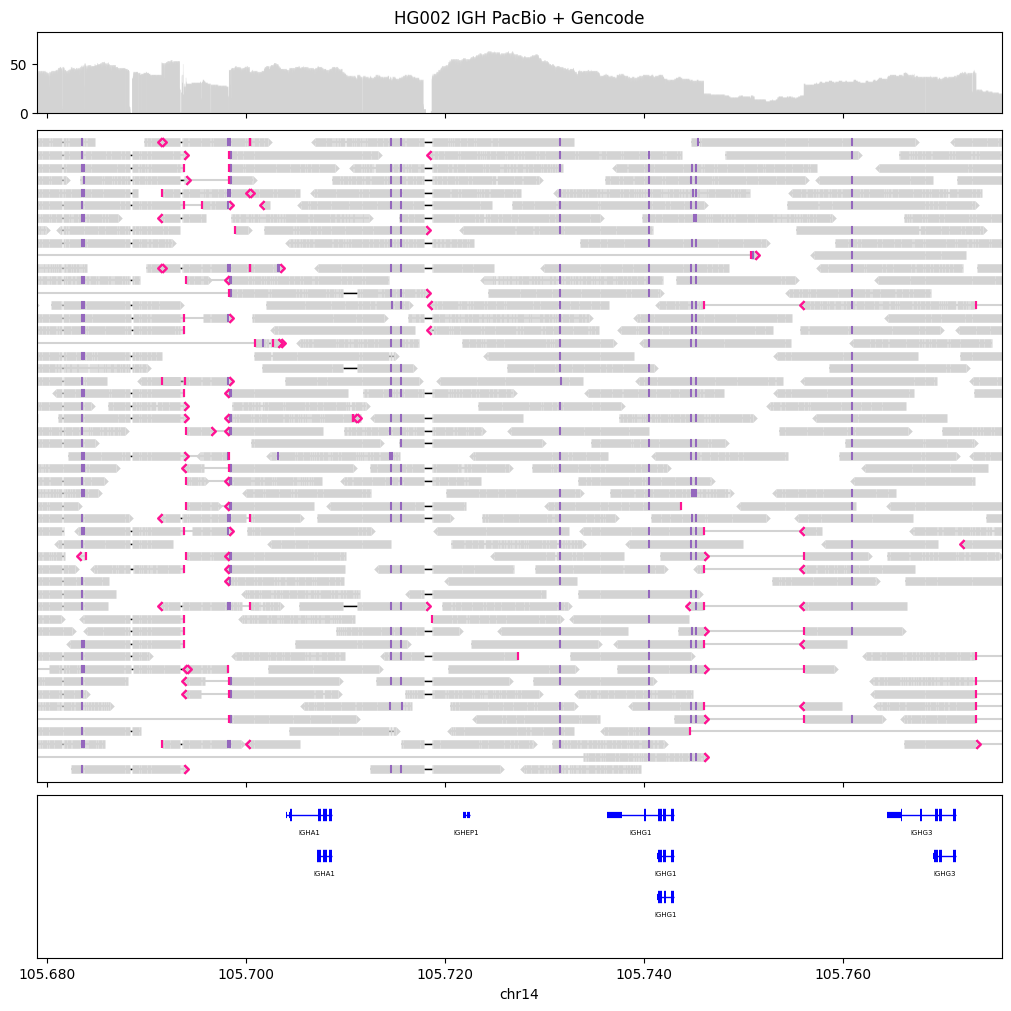

In [6]:
CHROMOSOME = "chr14"
START = 104586347
END = 107043718
GENCODE_GTF_PATH = "../../tests/data/gencode.v40.annotation.gtf.gz"
PACBIO_BAM_PATH = "../../tests/data/HG002_IGH_PacBio_CCS.bam"

with gzip.open(GENCODE_GTF_PATH, "rt") as f:
    gencode_painter = lv.GeneAnnotation.from_gencode_gtf(
        f,
        'gtf',
        region=(CHROMOSOME, (START, END))
    )
pacbio_painter = lv.SequenceAlignment.from_file(
    PACBIO_BAM_PATH, region=(CHROMOSOME, (START, END))
)
gv = lv.GenomeViewer(3, height_ratios=(1, 8, 2))
pacbio_painter.draw_pileup(
    gv.axes[0],
    show_mismatches=False,
)
pacbio_painter.draw_alignment(
    gv.axes[1],
    show_mismatches=False,
    sort_by="length",
    link_by="name",
    max_group_height=50,
)
gencode_painter.draw_transcripts(gv.axes[2], max_group_height=4, sort_by="length")

gv.set_xlim((105679000, 105776000))
gv.set_xlabel(CHROMOSOME)
gv.set_title("HG002 IGH PacBio + Gencode")
gv.xaxis.set_major_formatter(lv.util.base_formatter(unit="mb", fmt="{:.3f}"))
